In [1]:
import pandas as pd
import statsmodels as sm
import cbsodata
import matplotlib.pyplot as plt
import numpy as np
import functools as ft
import datetime
from functools import reduce
import os.path
from datetime import date

In [2]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

In [3]:
# https://opendata.cbs.nl/#/CBS/nl/dataset/83837NED/table
# https://opendata.cbs.nl/#/CBS/nl/dataset/85828NED/table?ts=1723788068156  ## Start Here ##

def monthToNum(dutchMonth):
    return {
            'januari': 1,
            'februari': 2,
            'maart': 3,
            'april': 4,
            'mei': 5,
            'juni': 6,
            'juli': 7,
            'augustus': 8,
            'september': 9, 
            'oktober': 10,
            'november': 11,
            'december': 12
    }[dutchMonth]

def macro_data_cbs_01(identifier, sectors = False, verbose = False):
    start_date = '01/01/2000'

    # get data
    data = pd.DataFrame(cbsodata.get_data(identifier))
    data.to_csv("tmp_all.csv")
    
    # select monthly data
    data = data[~data['Perioden'].str.contains("kwartaal")]
    data = data[~data['Perioden'].str.isdigit()]

    # split Perioden into Year and Month
    data[['Year', 'Month']] = data['Perioden'].str.split(' ', n=1, expand=True)

    # convert Month to number
    data['MonthNumber'] = data['Month'].apply(lambda x: monthToNum(x))

    # convert to datetime
    data['Perioden'] = pd.to_datetime(data['Year'] + '-' + data['MonthNumber'].astype(str))

    data.drop(['Year', 'Month', 'MonthNumber'], axis = 1, inplace = True)

    # first select ongecorrigeerd
    data = data[['BedrijfstakkenBranchesSBI2008', 'Perioden', 'Ongecorrigeerd_1']]

    # drop na, this removes a lot of rows
    data.dropna(inplace = True)

    # use pivot table to get industry columns
    data = data.pivot(index = "Perioden", columns = "BedrijfstakkenBranchesSBI2008", values = 'Ongecorrigeerd_1')   

    # extras
    print(data.columns)

    return data

In [4]:
NLD_basic_macro_data_01 = macro_data_cbs_01(identifier = '85828NED', sectors=False, verbose = False)


Index(['45 Autohandel en -reparatie', '451 Autohandel en -reparatie',
       '45111 Import van nieuwe personenauto's',
       '452 Gespecialiseerde autoreparatie', '453 Handel in auto-onderdelen',
       '454 Handel en reparatie van motorfietsen',
       '46 Groothandel en handelsbemiddeling',
       '462 Groothandel in landbouwproducten',
       '463 Groothandel in voedingsmiddelen', '464 Groothandel in non-food',
       '466 Groothandel in industriemachines',
       '467 Overige gespecialiseerde groothandel',
       '47 Detailhandel (niet in auto's)', '471 Supermarkten en warenhuizen',
       '4711 Supermarkten', '4711, 472 Winkels in voedingsmiddelen',
       '472 Winkels in voedingsmiddelen',
       '474 Winkels in consumentenelektronica',
       '475 Winkels in overige huishoudwaren',
       '4752 Winkels in doe-het-zelfartikelen', '47528 Bouwmarkten',
       '4759 Winkels overige huishoudartikelen',
       '476 Winkels in recreatieartikelen', '477 Winkels in overige artikelen',
 

In [5]:

#####
# Check if file exists before saving to prevent over-writes
#####
today = date.today().strftime("%Y_%m_%d")

fileName = "HandelDiensten_raw1_" + today
fname = "../data/" + fileName + ".csv"

if ~(os.path.isfile(fname)):
    NLD_basic_macro_data_01.to_csv(fname, sep=",", header=True, index=True)

data = NLD_basic_macro_data_01.copy()

<Axes: xlabel='Perioden'>

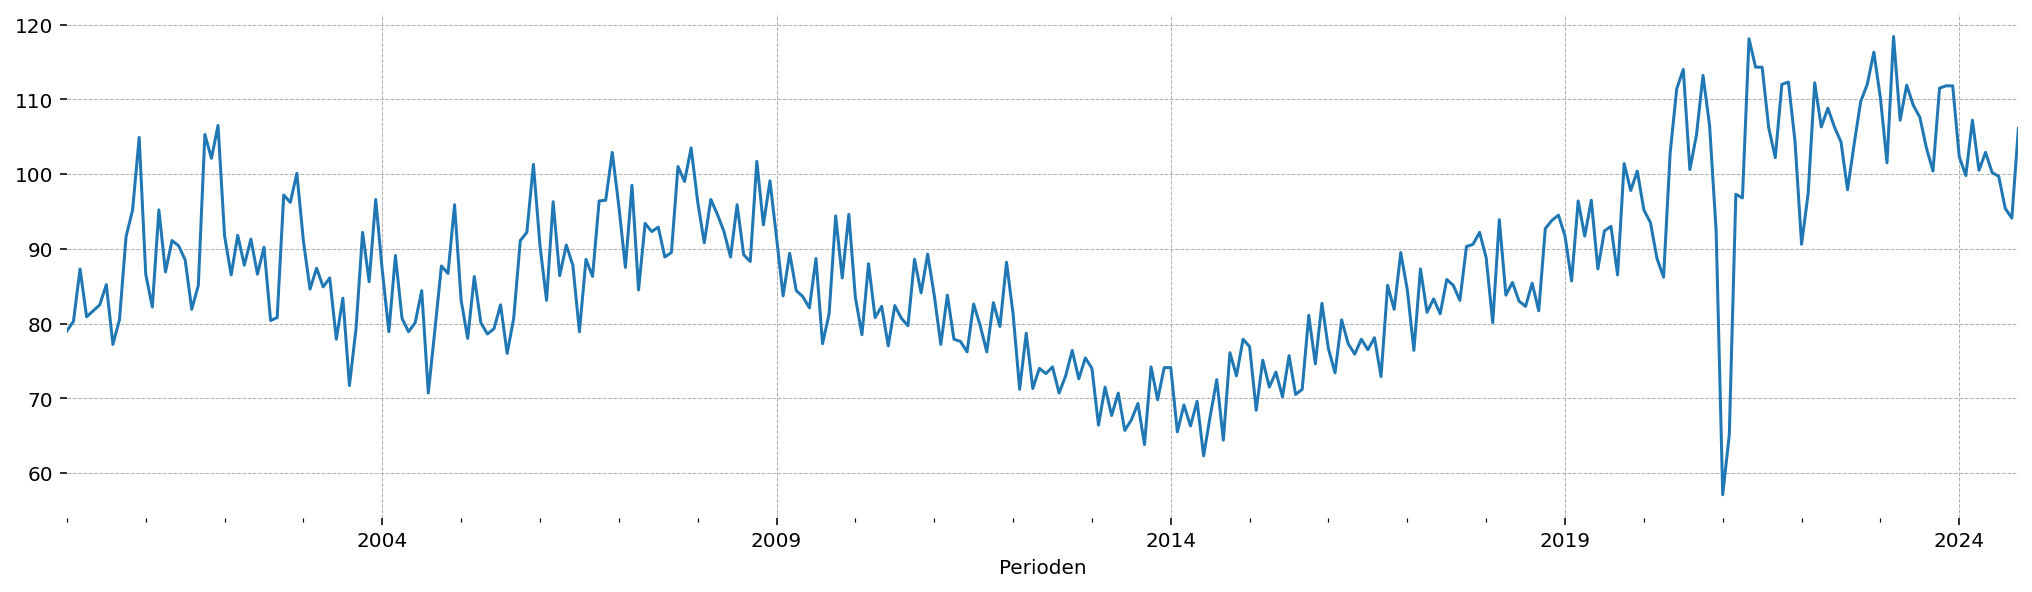

In [6]:
data.head()
data["Winkels in meubels, woninginrichting alg"].dropna().plot()
